#                                    Jeu de données Titanic

On importe les packages dont nous allons avoir besoin :

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier

On charge notre jeu de données, celui-ci contient 1309 observations de 14 variables différentes :

In [35]:
titanic = pd.read_excel('titanic.xls')

On affiche les 5 premières lignes de notre jeu de données, que nous avons nommé "titanic" afin d'avoir un aperçu de ce à quoi il ressemble :

In [36]:
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


On supprime les variables qui ne nous intéressent pas ici, nous n'allons garder que la classe dans laquelle les passagers ont voyagé, leur sexe, leur age ainsi que si oui ou non ils ont survécu :

In [37]:
titanic = titanic.drop(['name', 'sibsp', 'parch', 'ticket', 'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'], axis = 1)

On réaffiche les 5 premières lignes de notre jeu de données ainsi modifié :

In [38]:
titanic.head()

,pclass,survived,sex,age
0,1,1,female,29.0000
1,1,1,male,0.9167
2,1,0,female,2.0000
3,1,0,male,30.0000
4,1,0,female,25.0000


On affcihe les statistiques de bases (moyenne, écart-type, minimum, quartiles, maximum) de notre jeu de données :

In [39]:
titanic.describe()

,pclass,survived,age
count,1309.000000,1309.000000,1046.000000
mean,2.294882,0.381971,29.881135
std,0.837836,0.486055,14.413500
min,1.000000,0.000000,0.166700
25%,2.000000,0.000000,21.000000
50%,3.000000,0.000000,28.000000
75%,3.000000,1.000000,39.000000
max,3.000000,1.000000,80.000000


On observe qu'il y a moins d'observations d'aĝe que de classe ou de survie, ces données d'âge ne devaient pas être connues.

On supprime donc de notre jeu de données les lignes qui contiennent les valeurs d'âge manquantes :

In [40]:
titanic = titanic.dropna(axis = 0)

On réaffiche les statistiques de base de notre jeu de données nettoyés de ses données manquantes : 

In [41]:
titanic.describe()

,pclass,survived,age
count,1046.000000,1046.000000,1046.000000
mean,2.207457,0.408222,29.881135
std,0.841497,0.491740,14.413500
min,1.000000,0.000000,0.166700
25%,1.000000,0.000000,21.000000
50%,2.000000,0.000000,28.000000
75%,3.000000,1.000000,39.000000
max,3.000000,1.000000,80.000000


On peut observer, par exemple, que la moyenne d'âge des passagers était d'environ 30 ans ou encore que la personne la plus âgée avait 80 ans. 

On va compter le nombre de voyageurs par classe et en tracer un diagramme en barre : 

In [42]:
titanic['pclass'].value_counts()

3    501
1    284
2    261
Name: pclass, dtype: int64

<AxesSubplot:>

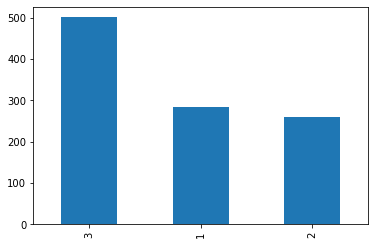

In [43]:
titanic['pclass'].value_counts().plot.bar()

On voit donc que sur nos 1046 voyageurs, 501 étaient en troisième, 284 en première et 261 en deuxième classe.

On représente la répartition des âges suivant un histogramme :

<AxesSubplot:>

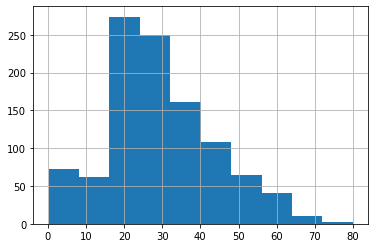

In [44]:
titanic['age'].hist()

On y observe que la plupart des passagers avaient environ entre 20 et 30 ans.

On regroupe les passsagers par sexe (female/male) et on fait la moyenne des observations : 

In [45]:
titanic.groupby(['sex']).mean()

,pclass,survived,age
sex,,,
female,2.048969,0.752577,28.687071
male,2.300912,0.205167,30.585233


On peut par exemple observer que 75,3% des femmes ont survécu contre seuelement 20,5% des hommes.

On regroupe les passagers par sexe (female/male) et par classe (1/2/3) et on fait la moyenne des observations.

In [46]:
titanic.groupby(['sex', 'pclass']).mean()

survived        age
sex    pclass                     
female 1       0.962406  37.037594
       2       0.893204  27.499191
       3       0.473684  22.185307
male   1       0.350993  41.029250
       2       0.145570  30.815401
       3       0.169054  25.962273

On peut observer, par exemple que les femmes qui voyageaient en 1ère classe avaient en moyenne 37 ans et ont pour 96,2% d'entre elles survécues. 
On peut également voir que les hommes qui voyageaient en 3ème classe avaient en moyenne 26 ans et n'ont pour seulement 16,9% d'entre eux survécus.

On constate qu'étonnement, les hommes qui voyageaient en troisième classe avaient plus de chances de survie que ceux qui voyageaient en deuxième classe.

On compte le nombre de passager âgés de moins de 18 ans par classe, c'est-à-dire qu'on crée un masque :

In [47]:
titanic[titanic['age'] < 18]['pclass'].value_counts()

3    106
2     33
1     15
Name: pclass, dtype: int64

On voit que le nombre total de passagers âgés de moins de 18 ans était de 154.
On voit qu'en 3ème classe il y avait 106 personnes âgées de moins de 18 ans, en 2ème classe il y en avait 33 et enfin en 1ère classe il n'y en avait que 15.

On prend les passagers âgés de moins de 18 ans , on les regroupe par sexe et par classe et on observe la moyenne de leur survie et de leur âge : 

In [48]:
titanic[titanic['age'] < 18].groupby(['sex', 'pclass']).mean()

survived        age
sex    pclass                     
female 1       0.875000  14.125000
       2       1.000000   8.273150
       3       0.543478   8.416667
male   1       0.857143   9.845243
       2       0.733333   6.222220
       3       0.233333   9.838888

On peut ici observer par exemple que parmi les femmes de moins de 18 ans qui voyageaient en première classe 87,5% ont survécues et elles avaient en moyenne 14 ans.
On peut aussi noter que parmi les hommes de moins de 18 ans qui voyagaient en troisième classe seuls 23% ont survécus.

On va créer 4 groupes parmi les passagers, ceux qui ont moins de 20 ans, ceux qui ont entre 20 et 30 ans, ceux qui ont entre 30 et 40 ans et enfin ceux qui ont plus de 40 ans : 

In [49]:
def category_ages(age) : 
    if age <= 20 : 
        return '< 20 ans'
    elif (age > 20) & (age <= 30) : 
        return '20-30 ans'
    elif (age > 30) & (age <= 40) : 
        return '30-40 ans'
    else :
        return '+ 40 ans'

In [50]:
titanic['age'].map(category_ages)

0       20-30 ans
1        < 20 ans
2        < 20 ans
3       20-30 ans
4       20-30 ans
          ...    
1301     + 40 ans
1304     < 20 ans
1306    20-30 ans
1307    20-30 ans
1308    20-30 ans
Name: age, Length: 1046, dtype: object

On va remplacer les valeurs "Male" et "Female" par, respectivement, des 0 et des 1 car il est plus facile de travailler avec des chiffres qu'avec des chaînes de caractères.

In [51]:
titanic['sex'].astype('category')

0       female
1         male
2       female
3         male
4       female
         ...  
1301      male
1304    female
1306      male
1307      male
1308      male
Name: sex, Length: 1046, dtype: category
Categories (2, object): ['female', 'male']

On utilise la fonction cat.codes qui a pour effet de convertir les différentes catégories en valeurs numériques. 

In [33]:
titanic['sex'].astype('category').cat.codes

0       0
1       1
2       0
3       1
4       0
       ..
1301    1
1304    0
1306    1
1307    1
1308    1
Length: 1046, dtype: int8

On voit donc que les désormais les "female" sont représentées par le nombre entier 0 et que les "male" sont représentés par le nombre entier 1.

--------------------------------------------------------------------------------------------------------------------

On va maintenant créer quelques graphiques à l'aide du package Seaborn qui est très pratique car il permet de créer des graphiques en très peu de lignes de codes. 

In [52]:
titanic = sns.load_dataset('titanic')

In [53]:
titanic.drop(['alone', 'alive', 'who', 'adult_male', 'embark_town', 'class'], axis = 1, inplace = True)
titanic.dropna(axis = 0, inplace = True)
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck
1,1,1,female,38.0,1,0,71.2833,C,C
3,1,1,female,35.0,1,0,53.1000,S,C
6,0,1,male,54.0,0,0,51.8625,S,E
10,1,3,female,4.0,1,1,16.7000,S,G
11,1,1,female,58.0,0,0,26.5500,S,C


On répète les mêmes opérations qu'au debut afin de ne garder que les variables qui nous intéresse ici.

----------------------------------------

On va ici créer quelques graphiques à l'aide de seaborn

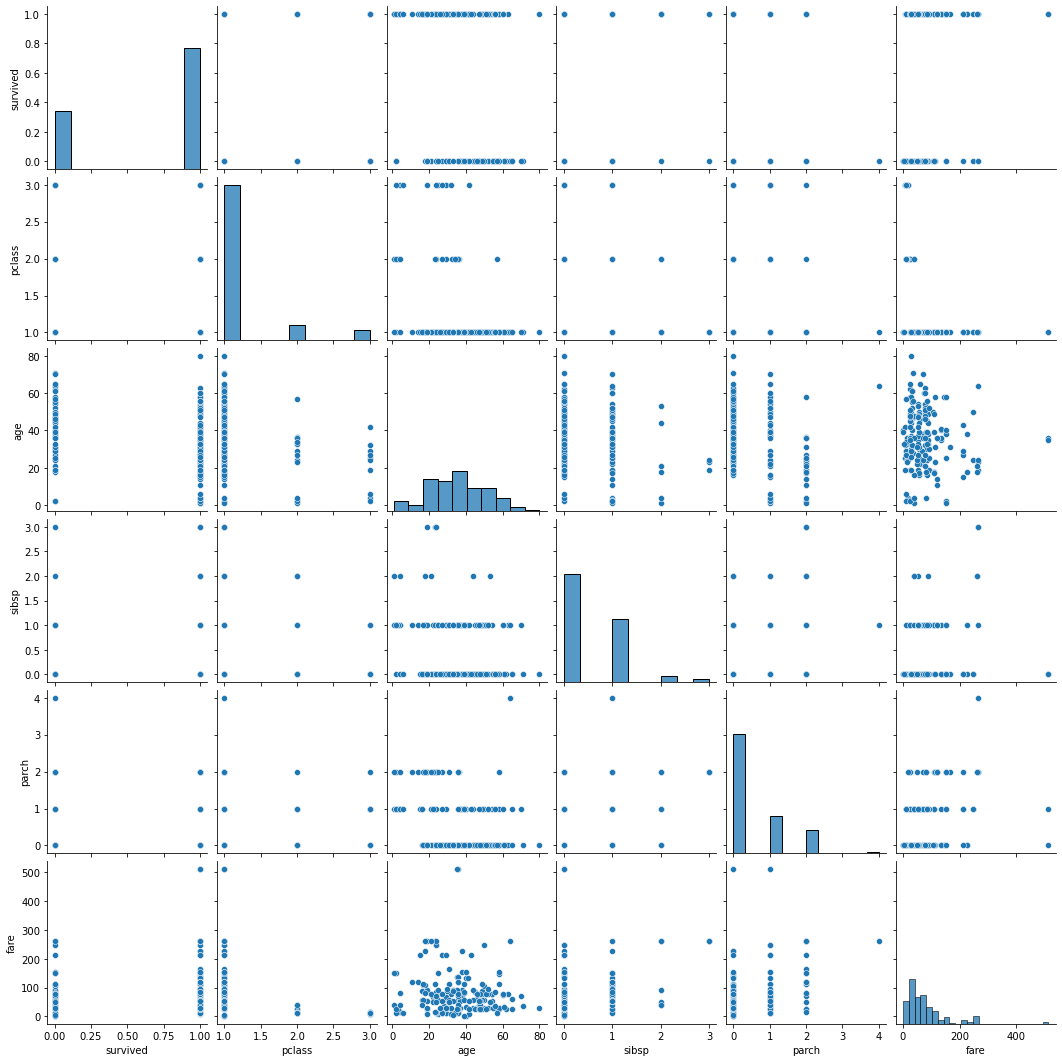

In [54]:
sns.pairplot(titanic)

Le graphique créé ne nous apprend pas grand chose car les variables forment des catégories :
    
    - Survived : 0 et 1
    - pclass : 1, 2 et 3

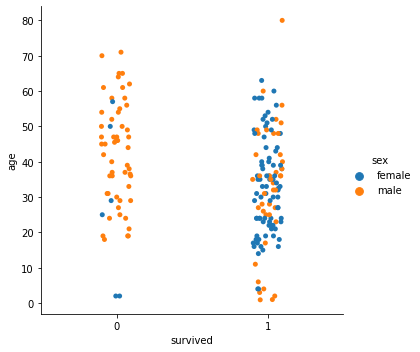

In [55]:
sns.catplot(x = 'survived', y = 'age', data = titanic, hue = 'sex')

Ce graphique est nettement plus intéressant, il nous montre les chances de survie des passages en fonction de leur âge et de leur sexe. 
On observe que la majorité des personnes qui ont survécu dans le naufrage du titanic sont des femmes.

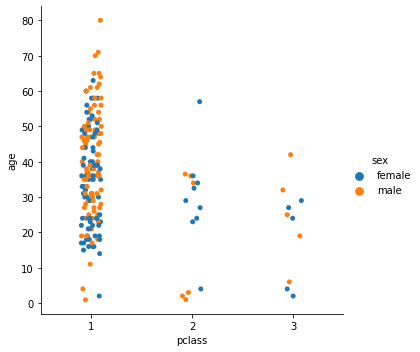

In [56]:
sns.catplot(x = 'pclass', y = 'age', data = titanic, hue = 'sex')

Ce graphique nous montre comment les hommes et les femmes étaient répartis dans les différentes classes et selon les différentes tranches d'âge.

<AxesSubplot:xlabel='pclass', ylabel='age'>

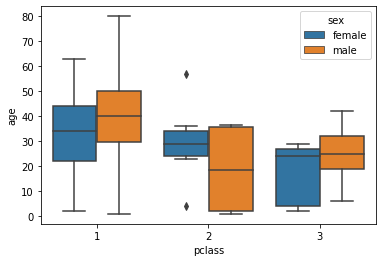

In [57]:
sns.boxplot(x = 'pclass', y = 'age', data = titanic, hue = 'sex')

Ce graphique nous permet de voir la répartition des données avec les principales statistiques (médianes, quartiles, etc...) sur différentes catégories de variables. Au milieu des boxplots se trouvent la médiane d'une série de donnée. Ici par exemple on voit que la médiane de l'âge des hommes en 1ère classe était de 40 ans. Aux extrémités on va retrouver les 1ers et 3emes quartiles. Ici, les hommes avaient majoritairement entre 30 ans et 50 ans. Les traits qui allongent les boîtes nous montrent toute l'étendue des valeurs restantes ( à l'exception des outliers).

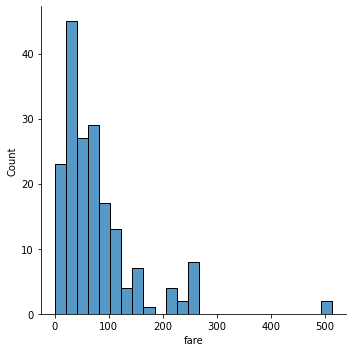

In [58]:
sns.displot(titanic['fare'])

On visualise la distribution de la variable tarif (fare). En l'occurence le tarif ne suit pas une distribution normale, les gens ont principalement voyagé au tarif le moins cher.

<AxesSubplot:>

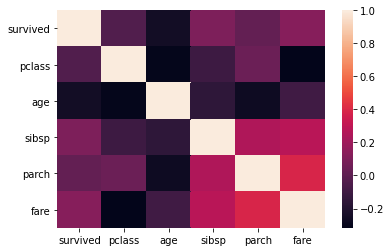

In [82]:
sns.heatmap(titanic.corr())

Ce graphique permet de mettre en évidence le niveau de corrélation entre les différentes variables qui composent notre jeu de données.
On note par exemple une très forte corrélation entre l'âge et la survie. 

--------------------------------------------------------------------------------------------------------------------

On importe notre dataset à l'aide de seaborn et on le filtre afin de ne garder que les variables qui nous intéresse : 

In [59]:
titanic = sns.load_dataset('titanic')
titanic.shape
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [60]:
titanic = titanic[['survived', 'pclass', 'sex', 'age']]
titanic.dropna(axis = 0, inplace = True)
titanic['sex'].replace(['male', 'female'], [0, 1], inplace = True)
titanic.head()

,survived,pclass,sex,age
0,0,3,0,22.0
1,1,1,1,38.0
2,1,3,1,26.0
3,1,1,1,35.0
4,0,3,0,35.0


On a donc conservé les variables de classe, de sexe, d'âge et de survie.

On va essayer de créer un modèle de classification pour déterminer si un passager du titanic va survivre ou non au naufrage du navire : 

On va alors charger un model de Classification, parmi ceux qui existe nous allons ici utiliser le classifieur KNeighbors :

In [61]:
model = KNeighborsClassifier()

On doit ensuite entraîner notre modèle sur des données x et y, alors on divise notre tableau titanic en deux, un tableau y qui être la colonne colonne "survived" et un tableau x qui contient toutes les autres variables.

In [63]:
y = titanic['survived']
X = titanic.drop('survived', axis = 1)

On crée notre modèle et on évalue sa performance : 

In [64]:
model.fit(X, y)
model.score(X, y)

0.8417366946778712

On voit que notre modèle obtient un score de 84,1%, c'est-à-dire que 84,1% du temps notre modèle arrive à prédire si notre passager a survécu ou non.

On va afficher les passagers qui ont survécus selon notre modèle : 

In [66]:
model.predict(X)

array([0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,

On affiche ici qui aurait survécu (0) et qui n'aurait pas survécu (1).

##### Et moi, aurais-je survécu au naufrage du titanic ?

Pour réponde à cette question on crée une fonction survie dans laquelle on va faire passer notre modèle ainsi qu'une classe de passager, une valeur pour notre sexe et une valeur pour notre âge. 

(On pourrait directement initialiser cette fonction avec des valeurs par défaut)

In [70]:
def survie(model, pclass, sex, age):
    x = np.array([pclass, sex, age]).reshape(1, 3)
    print(model.predict(x))
    print(model.predict_proba(x))

J'aurais très certainement voyagé en troisième classe, je suis de sexe féminin (ce qui correspond à l'entier 1, comme définit précédemment) et j'ai 23 ans.

In [71]:
survie(model, 3, 1, 23)

[0]
[[0.6 0.4]]


C:\Users\anael\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\anael\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Un fois renseignées les informations à mon sujet, le modèle estime que je n'aurais pas survécu. Que j'avais 60% de chance d'appartenir à la classe 1 (décès) et 40% de chance d'appartenir à la classe 0 (survie).

Attention, ce résultat est à prendre avec des pincettes car comme indiqué précédemment, le modèle que nous avons n'est fiable qu'à un peu plus de 80%.

--------------------------------------------------------------------------------------------------------------------

Pour améliorer notre modèle nous allons lui rajouter un hyper-paramètre :

In [74]:
model = KNeighborsClassifier(n_neighbors = 5) #On choisit un chiffre entre 0 et 10 par exemple

On crée notre modèle KNN avec un nombre de voisins égal à 5 (chiffre choisit pour l'exemple)

On cherche à trouver le meilleur nombre de voisins possibles pour notre algorithme, celui qui nous donne les meilleures performances.

Pour cela on a écrit le code suivant, n acrée une fonction qui va enregistrer les scores de notre modèle pour un nombre de voisins allant de 1 à 30 : 

1


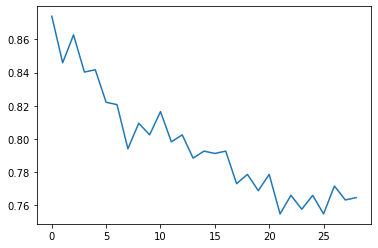

In [75]:
score = []
best_k = 1
best_score = 0

for k in range(best_k, 30):
    model = KNeighborsClassifier(n_neighbors = k)
    model.fit(X, y)
    score.append(model.score(X, y))
        
    if best_score < model.score(X, y):
        best_k = k
        best_score = model.score(X, y)

print(best_k)
plt.plot(score)

On obtient alors cette courbe de performances et on voit que notre modèle est le plus performant quand le nombre de voisins est égal à 2.

Attention ! Cette méthode de classisification est mauvaise car nous n'avons pas créer de train et de test sets pour entraîner puis évaluer notre modèle. 

J'ai utilisé ce modèle ici pour en faire un exemple, vous pourrez retrouvez la bonne méthode avec des train sets et des tests sets dans le document concernant le jeu de données Iris.